In [1]:
!python --version 


Python 3.13.4


In [2]:
import pandas as pd
n=12
dataset={'img':[i for i in range(n)] ,
         'age':[2*i+5 for i in range(n)],
         'sex':[0]*(n//2)+[1]*(n//2),
        'B0':[1.5]*(n//2)+[3]*(n//2)}
dataset=pd.DataFrame(dataset)


In [3]:
print( dataset)
dataset.head()

    img  age  sex   B0
0     0    5    0  1.5
1     1    7    0  1.5
2     2    9    0  1.5
3     3   11    0  1.5
4     4   13    0  1.5
5     5   15    0  1.5
6     6   17    1  3.0
7     7   19    1  3.0
8     8   21    1  3.0
9     9   23    1  3.0
10   10   25    1  3.0
11   11   27    1  3.0


,img,age,sex,B0
0,0,5,0,1.5
1,1,7,0,1.5
2,2,9,0,1.5
3,3,11,0,1.5
4,4,13,0,1.5


In [4]:
def read_dataset_by_index(dataset):    
    dataset = dataset.reset_index(drop=True)
    read_index=list(map(int,input("Enter the index of the row you want to read (zero-indexed): ").split()))
    if max(read_index) >= len(dataset):
        print("Index out of range. Please enter valid indices.")
    # elif read_index not in(dataset.index.tolist()):
    #     print("Index not found in the dataset. Please enter valid indices,or try on another dataset.")     
    
    return dataset.iloc[read_index]

In [5]:
read_dataset_by_index(dataset=dataset)

,img,age,sex,B0
1,1,7,0,1.5
2,2,9,0,1.5
3,3,11,0,1.5


In [6]:
def filter_dataset_age_range(dataset):
    input_age = list(map(int,input("Enter the age range you want to filter").split()))
    if len(input_age) != 2:
        print("Please enter exactly two ages to define the range.") 
    elif input_age[0] >= input_age[1]:
        input_age[0],input_age[1]=input_age[1],input_age[0]
    filtered_dataset = dataset.query('age >= @input_age[0] and age <= @input_age[1]')
    return filtered_dataset.iloc[:]
filter_dataset_age_range(dataset=dataset)
                     

,img,age,sex,B0
0,0,5,0,1.5
1,1,7,0,1.5
2,2,9,0,1.5
3,3,11,0,1.5
4,4,13,0,1.5
5,5,15,0,1.5
6,6,17,1,3.0
7,7,19,1,3.0
8,8,21,1,3.0
9,9,23,1,3.0


In [7]:
import random
import numpy as np
def simulate_model_output(batch_num=10):
    totaal_output = np.array([0]).reshape(-1, 1)    
    for i in range(batch_num):
        #output=model(input) 
        output=np.array(random.sample(range(1, 100), 4))
        output=output.reshape(-1,1)
        print(f'{i+1}th output:', output)
        totaal_output=np.concatenate((totaal_output,output))
    totaal_output = totaal_output[1:, :]  # Remove the first column of zeros
    return totaal_output
output=simulate_model_output(2)
output=output.squeeze()
print("Total output:", output)

1th output: [[67]
 [94]
 [53]
 [39]]
2th output: [[82]
 [58]
 [85]
 [41]]
Total output: [67 94 53 39 82 58 85 41]


In [8]:
from sklearn.linear_model import LinearRegression
val_true_age=simulate_model_output(3)
val_predicted_age=simulate_model_output(3)
def build_bias_correction_model(val_true_age, val_predicted_age):
    if len(val_true_age) != len(val_predicted_age):
        raise ValueError("The lengths of true_age and predicted_age must be the same.")
    
    PAD = (val_predicted_age - val_true_age)
    reg=LinearRegression().fit(PAD.reshape(-1, 1), val_true_age)
    print('val R squared:', reg.score(PAD.reshape(-1, 1), val_true_age))
    print('val Coefficients:', reg.coef_)
    print('val Intercept:', reg.intercept_)
    return reg

reg=build_bias_correction_model(val_true_age, val_predicted_age)    


    
test_true_age=simulate_model_output(3)
test_predicted_age=simulate_model_output(3)

def apply_bias_correction_model(reg,test_true_age, test_predicted_age):
    if len(test_true_age) != len(test_predicted_age):
        raise ValueError("The lengths of true_age and predicted_age must be the same.")
    
    test_PAD = (test_predicted_age - test_true_age)
    corrected_PAD = test_PAD - reg.predict(test_true_age.reshape(-1, 1))
    return corrected_PAD

corrected_PAD=apply_bias_correction_model(reg, test_true_age, test_predicted_age)
print('Corrected PAD:', corrected_PAD)
    

1th output: [[74]
 [95]
 [20]
 [60]]
2th output: [[37]
 [99]
 [38]
 [94]]
3th output: [[88]
 [28]
 [92]
 [64]]
1th output: [[65]
 [31]
 [56]
 [63]]
2th output: [[62]
 [41]
 [24]
 [ 3]]
3th output: [[12]
 [76]
 [78]
 [98]]
val R squared: 0.6766936578651224
val Coefficients: [[-0.50121556]]
val Intercept: [58.23176661]
1th output: [[58]
 [31]
 [54]
 [74]]
2th output: [[44]
 [ 6]
 [73]
 [78]]
3th output: [[23]
 [24]
 [99]
 [48]]
1th output: [[33]
 [32]
 [19]
 [84]]
2th output: [[45]
 [93]
 [73]
 [50]]
3th output: [[97]
 [34]
 [47]
 [53]]
Corrected PAD: [[-54.16126418]
 [-41.69408428]
 [-66.16612642]
 [-11.14181524]
 [-35.17828201]
 [ 31.77552674]
 [-21.64303079]
 [-47.136953  ]
 [ 27.29619125]
 [-36.20259319]
 [-60.61142626]
 [-29.17341977]]


Data for plot:
     true_age  predicted_age(corrected)  corrected_PAD
0         58                  3.838736     -54.161264
1         31                -10.694084     -41.694084
2         54                -12.166126     -66.166126
3         74                 62.858185     -11.141815
4         44                  8.821718     -35.178282
5          6                 37.775527      31.775527
6         73                 51.356969     -21.643031
7         78                 30.863047     -47.136953
8         23                 50.296191      27.296191
9         24                -12.202593     -36.202593
10        99                 38.388574     -60.611426
11        48                 18.826580     -29.173420


<Axes: title={'center': 'True Age vs Predicted Age with Bias Correction'}, xlabel='true_age', ylabel='predicted_age(corrected)'>

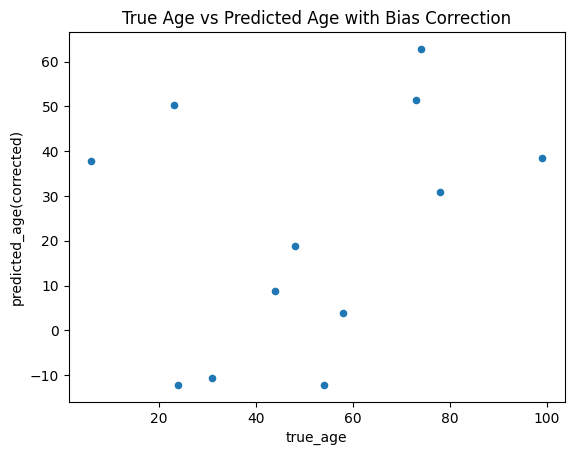

In [9]:
predicted_age = test_true_age + corrected_PAD
data_for_plot= pd.DataFrame({'true_age': test_true_age.flatten(),
                             'predicted_age(corrected)': predicted_age.flatten(),
                             'corrected_PAD': corrected_PAD.flatten()})
print("Data for plot:\n", data_for_plot)
data_for_plot.plot.scatter(x='true_age', y='predicted_age(corrected)', title='True Age vs Predicted Age with Bias Correction')

In [10]:
def liner_reg_for_plot(data_for_plot):
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(data_for_plot[['true_age']], data_for_plot['predicted_age(corrected)'])
    total_PAD=sum(data_for_plot['corrected_PAD'])
    print('Total PAD:', total_PAD)
    print('R squared:', reg.score(data_for_plot[['true_age']], data_for_plot['predicted_age(corrected)']))
    print('Coefficients:', reg.coef_)
    print('Intercept:', reg.intercept_)
    
reg_for_plot = liner_reg_for_plot(data_for_plot)

Total PAD: -344.03727714748777
R squared: 0.1030251898787864
Coefficients: [0.31590692]
Intercept: 6.2189741280989175


In [11]:
def merge_dataset_and_predicted_age(dataset, data_for_plot):
    dataset = dataset.copy()
    dataset['predicted_age(corrected)'] = data_for_plot['predicted_age(corrected)'].values
    dataset['corrected_PAD'] = data_for_plot['corrected_PAD'].values
    return dataset

dataset=merge_dataset_and_predicted_age(dataset, data_for_plot)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dataset.info()
dataset.iloc[:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   img                       12 non-null     int64  
 1   age                       12 non-null     int64  
 2   sex                       12 non-null     int64  
 3   B0                        12 non-null     float64
 4   predicted_age(corrected)  12 non-null     float64
 5   corrected_PAD             12 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 708.0 bytes


,img,age,sex,B0,predicted_age(corrected),corrected_PAD
0,0,5,0,1.5,3.838736,-54.161264
1,1,7,0,1.5,-10.694084,-41.694084
2,2,9,0,1.5,-12.166126,-66.166126
3,3,11,0,1.5,62.858185,-11.141815
4,4,13,0,1.5,8.821718,-35.178282
5,5,15,0,1.5,37.775527,31.775527
6,6,17,1,3.0,51.356969,-21.643031
7,7,19,1,3.0,30.863047,-47.136953
8,8,21,1,3.0,50.296191,27.296191
9,9,23,1,3.0,-12.202593,-36.202593


In [12]:
from scipy.stats import ttest_ind
# Perform t-tests on the corrected PAD suppose to aquire dataset results form different models 
ttest_ind(dataset['corrected_PAD'], dataset['corrected_PAD'], equal_var=True, alternative='less') #(1<2) 
ttest_ind(dataset['corrected_PAD'], dataset['corrected_PAD'], equal_var=True, alternative='greater') #(1>2)

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(0.5), df=np.float64(22.0))

In [13]:
from sklearn.feature_selection import f_regression
#對沒有性別磁場的模型進行性別磁場的anova，看性別磁場是否會影響PAD
sex=(np.array(dataset['sex'].values).reshape(-1,1))
B0=(np.array(dataset['B0'].values).reshape(-1,1))
x=np.concatenate((sex,B0),axis=1)
print(x)
print(x.shape)
y=np.array(dataset['corrected_PAD'].values).reshape(-1)
print(y)
print(y.shape)
f_statistic, p_values = f_regression(x,y)
p_values




[[0.  1.5]
 [0.  1.5]
 [0.  1.5]
 [0.  1.5]
 [0.  1.5]
 [0.  1.5]
 [1.  3. ]
 [1.  3. ]
 [1.  3. ]
 [1.  3. ]
 [1.  3. ]
 [1.  3. ]]
(12, 2)
[-54.16126418 -41.69408428 -66.16612642 -11.14181524 -35.17828201
  31.77552674 -21.64303079 -47.136953    27.29619125 -36.20259319
 -60.61142626 -29.17341977]
(12,)


array([0.93796301, 0.93796301])